In [1]:
!pip install gprofiler-official

In [1]:
!pip list | findstr gprofiler

gprofiler-official            1.0.0


In [41]:
import GEOparse
import seaborn as sns
from gprofiler import GProfiler
import requests
import pandas as pd

In [ ]:
r = requests.post(
    url='https://biit.cs.ut.ee/gprofiler/api/snpense/snpense/',
    json={
        'organism':'hsapiens',
        'query':['rs11734132', 'rs7961894', 'rs4305276'],
    }
    )
r.json()['result']

In [5]:
gp = GProfiler(return_dataframe=True)
gp.snpense(query=['rs11734132', 'rs7961894', 'rs4305276', 'rs17396340'])

,rs_id,chromosome,strand,start,end,ensgs,gene_names,variants
0,rs11734132,,,-1,-1,[],[],"{'intron_variant': 0, 'non_coding_transcript_v..."
1,rs7961894,12,+,121927677,121927677,[ENSG00000158023],[CFAP251],"{'intron_variant': 3, 'non_coding_transcript_v..."
2,rs4305276,2,+,240555596,240555596,[ENSG00000144504],[ANKMY1],"{'intron_variant': 57, 'non_coding_transcript_..."
3,rs17396340,1,+,10226118,10226118,[ENSG00000054523],[KIF1B],"{'intron_variant': 10, 'non_coding_transcript_..."


In [12]:
gpl_tab = data_ALL.gpls['GPL6801'].table
gpl_SNP = gpl_tab['SNP_ID'].dropna().to_list()
gpl_SNP[:10]

['rs6576700',
 'rs17054099',
 'rs7730126',
 'rs2061700',
 'rs10834942',
 'rs17419765',
 'rs7995987',
 'rs16865866',
 'rs7828844',
 'rs11040883']

In [14]:
len(gpl_SNP)

939034

In [21]:
import math

In [19]:
part_SNP = gpl_SNP[:100000]
gpl_gene = gp.snpense(query=part_SNP)

In [28]:
gpl_gene.shape

(934965, 8)

In [26]:
for i in range(4,math.ceil(len(gpl_SNP)/100000)):
    print(i*100000," ",(i+1)*100000)

400000   500000
500000   600000
600000   700000
700000   800000
800000   900000
900000   1000000


In [27]:
for i in range(3,math.ceil(len(gpl_SNP)/100000)):
    part_SNP = gpl_SNP[i*100000:(i+1)*100000]
    print("start: ",i)
    part_gpl_gene = gp.snpense(query=part_SNP)
    gpl_gene = gpl_gene.append(part_gpl_gene, ignore_index=True)
    print((i+1)*100000," : Processing")
print("finish")

start:  3
400000  : Processing
start:  4
500000  : Processing
start:  5
600000  : Processing
start:  6
700000  : Processing
start:  7
800000  : Processing
start:  8
900000  : Processing
start:  9
1000000  : Processing
finish


In [29]:
gpl_gene.to_csv('GPL_GENE.csv')

In [52]:
a = pd.Series([['GAGE1']]*len(gpl_gene), index = gpl_gene.index)
gpl_gene[gpl_gene['gene_names'] == a]

,rs_id,chromosome,strand,start,end,ensgs,gene_names,variants
44983,rs7060479,X,+,49607541,49607541,[ENSG00000205777],[GAGE1],"{'3_prime_UTR_variant': 2, '5_prime_UTR_varian..."
270851,rs6520435,X,+,49607806,49607806,[ENSG00000205777],[GAGE1],"{'3_prime_UTR_variant': 2, '5_prime_UTR_varian..."
450580,rs5906845,X,+,49606298,49606298,[ENSG00000205777],[GAGE1],"{'3_prime_UTR_variant': 6, '5_prime_UTR_varian..."
461285,rs5906846,X,+,49606320,49606320,[ENSG00000205777],[GAGE1],"{'3_prime_UTR_variant': 4, '5_prime_UTR_varian..."
934450,rs5906839,X,+,49604073,49604073,[ENSG00000205777],[GAGE1],"{'3_prime_UTR_variant': 0, '5_prime_UTR_varian..."
934960,rs2869181,X,+,49603386,49603386,[ENSG00000205777],[GAGE1],"{'3_prime_UTR_variant': 0, '5_prime_UTR_varian..."


In [58]:
gpl_gene

,rs_id,chromosome,strand,start,end,ensgs,gene_names,variants
0,rs6576700,1,+,84409490,84409490,[ENSG00000137976],[DNASE2B],"{'3_prime_UTR_variant': 0, '5_prime_UTR_varian..."
1,rs17054099,,,-1,-1,[],[],"{'3_prime_UTR_variant': 0, '5_prime_UTR_varian..."
2,rs7730126,,,-1,-1,[],[],"{'3_prime_UTR_variant': 0, '5_prime_UTR_varian..."
3,rs2061700,9,+,22976593,22976593,[ENSG00000284418],[ENSG00000284418],"{'3_prime_UTR_variant': 0, '5_prime_UTR_varian..."
4,rs10834942,11,+,26279422,26279422,[ENSG00000134343],[ANO3],"{'3_prime_UTR_variant': 0, '5_prime_UTR_varian..."
...,...,...,...,...,...,...,...,...
934960,rs2869181,X,+,49603386,49603386,[ENSG00000205777],[GAGE1],"{'3_prime_UTR_variant': 0, '5_prime_UTR_varian..."
934961,rs1944213,,,-1,-1,[],[],"{'3_prime_UTR_variant': 0, '5_prime_UTR_varian..."
934962,rs4149358,6,+,3003736,3003736,[ENSG00000124588],[NQO2],"{'3_prime_UTR_variant': 0, '5_prime_UTR_varian..."
934963,rs1137130,X,+,49326707,49326707,[ENSG00000224659],[GAGE12J],"{'3_prime_UTR_variant': 0, '5_prime_UTR_varian..."


In [55]:
gpl_tab['gene_names'] = gpl_gene['gene_names']

In [ ]:
gpl_tab = gpl_tab.rename(columns = {"ID":"ID_REF"})
gpl_tab.columns

In [85]:
gpl_tab

,ID_REF,Chromosome,RANGE_GB,RANGE_START,RANGE_STOP,STRAND,Physical Position,SNP_ID,Allele A,Allele B,gene_names
0,SNP_A-1780419,1,NC_000001.10,NaN,NaN,-,84875173,rs6576700,A,G,[DNASE2B]
1,SNP_A-1780418,5,NC_000005.9,NaN,NaN,-,156390980,rs17054099,C,T,[]
2,SNP_A-1780415,5,NC_000005.9,NaN,NaN,-,158729947,rs7730126,A,G,[]
3,SNP_A-1780414,9,NC_000009.11,NaN,NaN,+,22976592,rs2061700,A,C,[ENSG00000284418]
4,SNP_A-1780413,11,NC_000011.9,NaN,NaN,+,26300969,rs10834942,A,G,[ANO3]
...,...,...,...,...,...,...,...,...,...,...,...
1880789,CN_943501,Y,NaN,28776718,28776743,+,NaN,NaN,NaN,NaN,NaN
1880790,CN_943488,Y,NaN,28742338,28742363,+,NaN,NaN,NaN,NaN,NaN
1880791,CN_943500,Y,NaN,28775153,28775178,+,NaN,NaN,NaN,NaN,NaN
1880792,CN_943487,Y,NaN,28741856,28741881,+,NaN,NaN,NaN,NaN,NaN


In [73]:
data_ALL.gsms.keys()

dict_keys(['GSM1372995', 'GSM1372996', 'GSM1372997', 'GSM1372998', 'GSM1372999', 'GSM1373000', 'GSM1373001', 'GSM1373002', 'GSM1373003', 'GSM1373004', 'GSM1373005', 'GSM1373006', 'GSM1373007', 'GSM1373008', 'GSM1373009', 'GSM1373010', 'GSM1373011', 'GSM1373012', 'GSM1373013', 'GSM1373014', 'GSM1373015', 'GSM1373016', 'GSM1373017', 'GSM1373018', 'GSM1373019', 'GSM1373020', 'GSM1373021', 'GSM1373022', 'GSM1373023', 'GSM1373024', 'GSM1373025', 'GSM1373026', 'GSM1373027', 'GSM1373028', 'GSM1373029', 'GSM1373030', 'GSM1373031', 'GSM1373032', 'GSM1373033', 'GSM1373034', 'GSM1373035', 'GSM1373036', 'GSM1373037', 'GSM1373038', 'GSM1373039', 'GSM1373040', 'GSM1373041', 'GSM1373042', 'GSM1373043', 'GSM1373044'])

In [63]:
data_ALL.gsms['GSM1372996'].table.head()

,ID_REF,VALUE,CONFIDENCE,FORCED CALL,SIGNAL A,SIGNAL B
0,SNP_A-2131660,AA,0.000283,AA,3580.801025,660.494263
1,SNP_A-1967418,BB,0.022533,BB,294.179260,572.763367
2,SNP_A-1969580,BB,0.011248,BB,668.103638,2766.545654
3,SNP_A-4263484,AA,0.001916,AA,2240.434326,396.718445
4,SNP_A-1978185,AA,0.002045,AA,1126.322388,400.657501


In [87]:
data_tab = data_ALL.gsms['GSM1372995'].table

In [82]:
gpl_tab[gpl_tab.ID == "SNP_A-2131660"]

,ID,Chromosome,RANGE_GB,RANGE_START,RANGE_STOP,STRAND,Physical Position,SNP_ID,Allele A,Allele B,gene_names
254562,SNP_A-2131660,1,NC_000001.10,NaN,NaN,+,1156131,rs2887286,C,T,[SDF4]


In [ ]:
#super inefficient. record down. use merge instead
data_tab['gene_names'] = data_tab['ID_REF'].apply(lambda x: gpl_tab[gpl_tab[]])

In [ ]:
gpl_tab

In [129]:
#SG_map = data_tab[['ID_REF', 'FORCED CALL']].join(gpl_tab[['ID_REF','gene_names']], on="ID_REF")
#SG_map = pd.concat([data_tab[['ID_REF', 'FORCED CALL']], gpl_tab[['ID_REF','gene_names']]], join="outer", axis=1)
SG_map = data_tab[['ID_REF', 'FORCED CALL']].merge(gpl_tab[['ID_REF','gene_names','STRAND']], how='left', on='ID_REF')
SG_map

,ID_REF,FORCED CALL,gene_names,STRAND
0,SNP_A-2131660,BB,[SDF4],+
1,SNP_A-1967418,BB,[SKI],+
2,SNP_A-1969580,BB,[RER1],+
3,SNP_A-4263484,BB,[MMEL1],+
4,SNP_A-1978185,AA,[],-
...,...,...,...,...
909617,AFFX-SNP_9636222,AA,[LINC00278],-
909618,AFFX-SNP_11947839,BB,[MTUS1],-
909619,AFFX-SNP_10163916,BB,[GABRR1],+
909620,AFFX-SNP_8381449,AB,[],-


In [93]:
data_tab.shape

(909622, 6)

In [126]:
dataset = pd.DataFrame()
for GSM_name in data_ALL.gsms.keys():
    dataset = pd.concat([dataset, data_ALL.gsms[GSM_name].table['FORCED CALL']], axis=1)

In [136]:
dataset = dataset.T.reset_index(drop=True).T
dataset = pd.concat([dataset,SG_map['gene_names']], axis=1)
dataset = pd.concat([dataset,SG_map['STRAND']], axis=1)
dataset = dataset.append(data_ALL.phenotype_data['characteristics_ch1.0.diagnosis'].apply(lambda x: 0 if x == "Healthy donor" else 1).reset_index(drop=True), ignore_index=True)
dataset

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,gene_names,STRAND
0,BB,AA,AA,BB,BB,AB,BB,AB,BB,BB,...,BB,AB,AB,BB,AA,AA,AA,AA,[SDF4],+
1,BB,BB,BB,BB,AA,BB,BB,BB,BB,AA,...,BB,BB,BB,AB,AB,BB,BB,AB,[SKI],+
2,BB,BB,BB,BB,BB,BB,BB,BB,BB,BB,...,BB,BB,BB,BB,BB,BB,BB,BB,[RER1],+
3,BB,AA,AB,AB,BB,AA,BB,BB,BB,AB,...,BB,BB,AB,AB,AB,AA,AB,BB,[MMEL1],+
4,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,AA,AA,AA,AB,AA,AB,AB,[],-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909618,BB,BB,BB,BB,BB,BB,BB,BB,BB,AB,...,BB,BB,BB,AB,BB,BB,BB,BB,[MTUS1],-
909619,BB,AB,AB,AA,BB,AB,BB,AB,AA,AB,...,AB,AA,AA,AA,AA,AB,AB,AB,[GABRR1],+
909620,AB,AB,BB,AA,AA,AA,AA,AA,AA,AA,...,AB,AA,AB,AA,AB,BB,AA,AB,[],-
909621,BB,BB,AB,BB,AA,AB,BB,BB,BB,AB,...,BB,BB,BB,BB,AB,AA,AA,AB,[],+


In [138]:
dataset[dataset['STRAND']=='-'].shape

(453944, 52)

In [165]:
dataset_NC = dataset[dataset['STRAND']=='-']

In [163]:
import numpy as np

In [166]:
dataset_NC['gene_name'] = dataset_NC['gene_names'].apply(lambda x: x[0] if x else np.nan)
dataset_NC = dataset_NC.append(data_ALL.phenotype_data['characteristics_ch1.0.diagnosis'].apply(lambda x: 0 if x == "Healthy donor" else 1).reset_index(drop=True), ignore_index=True)

<ipython-input-166-9c497fd428fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_NC['gene_name'] = dataset_NC['gene_names'].apply(lambda x: x[0] if x else np.nan)


In [167]:
dataset_NC

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,gene_names,STRAND,gene_name
0,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,AA,AA,AB,AA,AB,AB,[],-,NaN
1,AB,AB,BB,AB,AA,AA,AB,AA,BB,AA,...,AB,AA,AA,BB,BB,AB,AB,[],-,NaN
2,AB,BB,BB,BB,AA,AB,BB,BB,BB,BB,...,BB,BB,BB,BB,AB,BB,BB,[PRDM16],-,PRDM16
3,AB,BB,AB,AA,AA,AA,AB,AA,AA,AA,...,AA,AA,AA,AA,AB,BB,AA,[PRDM16],-,PRDM16
4,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,AA,AA,AA,AA,AA,AA,[CEP104],-,CEP104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453940,AB,BB,AB,AB,AB,AA,AB,BB,BB,AB,...,BB,AB,AB,BB,BB,BB,BB,[],-,NaN
453941,AA,AB,AA,AB,BB,BB,AA,AB,AB,BB,...,BB,AB,AB,AB,AB,AB,BB,[LINC00278],-,LINC00278
453942,BB,BB,BB,BB,BB,BB,BB,BB,BB,AB,...,BB,BB,AB,BB,BB,BB,BB,[MTUS1],-,MTUS1
453943,AB,AB,BB,AA,AA,AA,AA,AA,AA,AA,...,AA,AB,AA,AB,BB,AA,AB,[],-,NaN


In [173]:
dataset_sf = dataset_NC.dropna(subset=['gene_name']).sort_values('gene_name')
#dataset_sf = dataset_sf.append(data_ALL.phenotype_data['characteristics_ch1.0.diagnosis'].apply(lambda x: 0 if x == "Healthy donor" else 1).reset_index(drop=True), ignore_index=True)
dataset_sf

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,gene_names,STRAND,gene_name
0,AB,BB,BB,AB,BB,BB,AB,BB,BB,BB,...,AB,BB,BB,BB,BB,BB,BB,[A1CF],-,A1CF
1,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,AA,AA,AA,AA,AA,AA,"[A1CF, ASAH2B]",-,A1CF
2,BB,AA,BB,AB,BB,BB,AB,BB,AB,AB,...,BB,BB,AB,AA,AB,AA,AA,[A1CF],-,A1CF
3,AA,AB,AA,AB,AA,AA,AB,AA,AB,AB,...,AB,AA,BB,BB,BB,BB,BB,[A1CF],-,A1CF
4,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,AA,AA,AA,AA,AA,AA,[A1CF],-,A1CF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277016,BB,BB,BB,BB,BB,BB,BB,BB,BB,BB,...,BB,BB,BB,BB,BB,BB,BB,[ZZZ3],-,ZZZ3
277017,AB,AA,AB,AA,AA,BB,AA,AB,AB,AA,...,BB,AA,AA,AA,AA,AB,AA,[ZZZ3],-,ZZZ3
277018,BB,BB,BB,BB,BB,BB,BB,BB,BB,BB,...,BB,BB,BB,BB,BB,BB,BB,[ZZZ3],-,ZZZ3
277019,AB,AA,AA,AA,AA,AA,AA,AA,AA,AB,...,AB,AA,AB,AA,AA,AA,AA,[ZZZ3],-,ZZZ3


In [194]:
df_y = data_ALL.phenotype_data['characteristics_ch1.0.diagnosis'].apply(lambda x: 0 if x == "Healthy donor" else 1).reset_index(drop=True)
df_y.to_csv('dataset_y.csv')

In [202]:
#https://hippocampus-garden.com/pandas_group_sample/
sampled_gene = np.random.choice(dataset_sf['gene_name'].unique(), 250)
sampled_gene = np.concatenate( (sampled_gene, ['MLLT2','MYC','ZNFN1A1','LAF4','WT1','NOTCH1','EZH2'] ) )
df_sampled = dataset_sf.groupby('gene_name').filter(lambda x: x["gene_name"].values[0] in sampled_gene)
df_sampled["gene_name"].nunique()

738

In [203]:
df_sampled.shape

(8302, 53)

In [205]:
df_sampled.columns

Index([           0,            1,            2,            3,            4,
                  5,            6,            7,            8,            9,
                 10,           11,           12,           13,           14,
                 15,           16,           17,           18,           19,
                 20,           21,           22,           23,           24,
                 25,           26,           27,           28,           29,
                 30,           31,           32,           33,           34,
                 35,           36,           37,           38,           39,
                 40,           41,           42,           43,           44,
                 45,           46,           47,           48,           49,
       'gene_names',     'STRAND',  'gene_name'],
      dtype='object')

In [206]:
df_sampled.drop(['gene_names','STRAND'],axis=1).to_csv('genesampled_738.csv')

In [ ]:
#http://www.bioinformatics.org/legend/leuk_db.htm
#

In [ ]:
sampled_users = np.random.choice(df["user_id"].unique(), 100)
df_sampled = df.query('user_id in @sampled_users')
df_sampled["user_id"].nunique()

In [185]:
dataset_sf['gene_name'].value_counts().head(20)

RBFOX1     1073
CSMD1       988
CDH13       588
PTPRD       568
FHIT        511
MACROD2     500
CNTNAP2     482
WWOX        480
DMD         445
ASIC2       369
CTNNA2      363
DAB1        363
LRP1B       332
NRXN3       326
DLG2        323
PRKG1       323
MAGI2       322
KAZN        317
PRKN        310
RBMS3       309
Name: gene_name, dtype: int64

In [176]:
"ASAH2B" in dataset_sf['gene_name'].unique()
#the variable overlaps!!!!!!!!!!!!!!!!!

True

In [179]:
"MYC" in dataset_sf['gene_name'].unique()

True

In [ ]:
data_ALL.phenotype_data['characteristics_ch1.0.diagnosis'].apply(lambda x: 0 if x == "Healthy donor" else 1).T

In [ ]:
dataset = pd.concat([dataset,data_ALL.phenotype_data['characteristics_ch1.0.diagnosis'].apply(lambda x: 0 if x == "Healthy donor" else 1).T],ignore_index=True)
dataset

In [79]:
k = []
for i,j in zip(list(data_ALL.gsms.keys())[:-1],list(data_ALL.gsms.keys())[1:]):
    k.append(all(data_ALL.gsms[i].table.ID_REF == data_ALL.gsms[j].table.ID_REF))
all(k)

True

In [57]:
gpl_tab.to_csv('gpl_tab_final.csv')

In [ ]:
import csv 
with open('snpense.csv', 'w') as f: 
    write = csv.writer(f)
    write.writerows(gpl_gene)

['DataIncompatibilityException', 'GDS', 'GDSSubset', 'GEODatabase', 'GEOTypes', 'GEOparse', 'GPL', 'GSE', 'GSM', 'NoMetadataException', '__author__', '__builtins__', '__cached__', '__doc__', '__email__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'add_log_file', 'downloader', 'geoparse_logger', 'get_GEO', 'get_GEO_file', 'logger', 'parse_GPL', 'parse_GSE', 'parse_GSM', 'set_verbosity', 'sra_downloader', 'utils']

In [6]:
data_ALL = GEOparse.get_GEO(filepath='leukemia_GEO\GSE57018_family.soft.gz', silent=True)

C:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\GEOparse\GEOparse.py:113: DtypeWarning: Columns (1,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath, open_kwargs=open_kwargs)


In [9]:
data_CLL = GEOparse.get_GEO(filepath='leukemia_GEO\GSE51711_family.soft.gz', silent=True)

05-Jul-2021 20:35:18 DEBUG utils - Directory ./ already exists. Skipping.
05-Jul-2021 20:35:18 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL96&form=text&view=full to ./GPL96.txt
05-Jul-2021 20:35:20 DEBUG downloader - Total size: 0
05-Jul-2021 20:35:20 DEBUG downloader - md5: None
44.4MB [00:19, 2.37MB/s]
05-Jul-2021 20:35:40 DEBUG downloader - Moving C:\Users\Admin\AppData\Local\Temp\tmpk47i6pdk to g:\realduel_codes\Leukemia\GPL96.txt
05-Jul-2021 20:35:40 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL96&form=text&view=full
05-Jul-2021 20:35:40 INFO GEOparse - Parsing ./GPL96.txt: 
05-Jul-2021 20:35:40 DEBUG GEOparse - PLATFORM: GPL96


print([i for i in dir(data_ALL)])
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__metaclass__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_metadata_as_string', '_get_object_as_soft', '_phenotype_data', 'database', 'download_SRA', 'download_supplementary_files', 'geotype', 'get_accession', 'get_metadata_attribute', 'get_type', 'gpls', 'gsms', 'merge_and_average', 'metadata', 'name', 'phenotype_data', 'pivot_and_annotate', 'pivot_samples', 'relations', 'show_metadata', 'to_soft']

In [21]:
#data_ALL.phenotype_data.to_csv('ALL_phenotype_data.csv')
data_ALL.phenotype_data.columns

Index(['title', 'geo_accession', 'status', 'submission_date',
       'last_update_date', 'type', 'channel_count', 'source_name_ch1',
       'organism_ch1', 'taxid_ch1', 'characteristics_ch1.0.diagnosis',
       'characteristics_ch1.1.status', 'molecule_ch1', 'extract_protocol_ch1',
       'label_ch1', 'label_protocol_ch1', 'hyb_protocol', 'scan_protocol',
       'data_processing', 'platform_id', 'contact_name', 'contact_email',
       'contact_laboratory', 'contact_department', 'contact_institute',
       'contact_address', 'contact_city', 'contact_zip/postal_code',
       'contact_country', 'supplementary_file', 'series_id', 'data_row_count'],
      dtype='object')

In [22]:
data_ALL.phenotype_data.source_name_ch1.value_counts()

bone marrow from acute lymphoblastic leukemia patient    45
bone marrow from healthy donor                            5
Name: source_name_ch1, dtype: int64

In [28]:
data_ALL.phenotype_data['characteristics_ch1.0.diagnosis'].value_counts()

Common B ALL     17
T-ALL             9
P190+ ALL         9
Healthy donor     5
P210+ ALL         4
pro-B ALL         3
pre-B ALL         3
Name: characteristics_ch1.0.diagnosis, dtype: int64

In [26]:
data_ALL.phenotype_data['characteristics_ch1.1.status'].value_counts()

newly diagnosed               32
CR                            10
untreated                      5
newly diagnosed (1)            1
relapse (3)                    1
CR(complete remission) (2)     1
Name: characteristics_ch1.1.status, dtype: int64

In [31]:
data_ALL.phenotype_data['molecule_ch1'].value_counts()

genomic DNA    50
Name: molecule_ch1, dtype: int64

In [37]:
data_ALL.phenotype_data.groupby('source_name_ch1').get_group('bone marrow from healthy donor').index

Index(['GSM1373040', 'GSM1373041', 'GSM1373042', 'GSM1373043', 'GSM1373044'], dtype='object')

In [41]:
data_ALL.gsms['GSM1372995'].table.columns

Index(['ID_REF', 'VALUE', 'CONFIDENCE', 'FORCED CALL', 'SIGNAL A', 'SIGNAL B'], dtype='object')

In [44]:
data_ALL.gsms['GSM1372995'].table.head()

,ID_REF,VALUE,CONFIDENCE,FORCED CALL,SIGNAL A,SIGNAL B
0,SNP_A-2131660,BB,0.001004,BB,813.266357,4081.506348
1,SNP_A-1967418,BB,0.008071,BB,289.061615,860.293091
2,SNP_A-1969580,BB,0.006015,BB,947.958496,3786.373535
3,SNP_A-4263484,BB,0.000538,BB,492.399475,1480.518311
4,SNP_A-1978185,AA,0.009533,AA,1596.510742,361.851501


In [ ]:
data_tab = data_ALL.gsms['GSM1372995'].table

In [ ]:
data_tab

In [52]:
data_tab.VALUE.unique()

array(['BB', 'AA', 'AB', 'NC'], dtype=object)

In [77]:
data_ALL.gsms['GSM1372995'].table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909622 entries, 0 to 909621
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID_REF       909622 non-null  object 
 1   VALUE        909622 non-null  object 
 2   CONFIDENCE   909622 non-null  float64
 3   FORCED CALL  909622 non-null  object 
 4   SIGNAL A     909622 non-null  float64
 5   SIGNAL B     909622 non-null  float64
dtypes: float64(3), object(3)
memory usage: 41.6+ MB


In [40]:
data_ALL.gsms['GSM1372995'].table.describe()

,CONFIDENCE,SIGNAL A,SIGNAL B
count,909622.000000,909622.000000,909622.000000
mean,0.008967,1211.536134,1170.381633
std,0.031216,939.496501,930.790652
min,0.000000,110.640297,108.965797
25%,0.002553,489.869263,454.167542
50%,0.004683,965.032837,923.367890
75%,0.008203,1659.416626,1605.851074
max,0.822442,17161.292969,23104.882812


In [42]:
data_ALL.gsms['GSM1373044'].table.describe()

,CONFIDENCE,SIGNAL A,SIGNAL B
count,909622.000000,909622.000000,909622.000000
mean,0.008606,1186.530536,1168.219436
std,0.034796,921.905699,932.209966
min,0.000000,107.308258,107.308258
25%,0.002083,486.768799,458.021187
50%,0.003882,943.778931,919.460022
75%,0.006992,1613.481170,1594.812256
max,0.820540,16944.552734,18143.152344


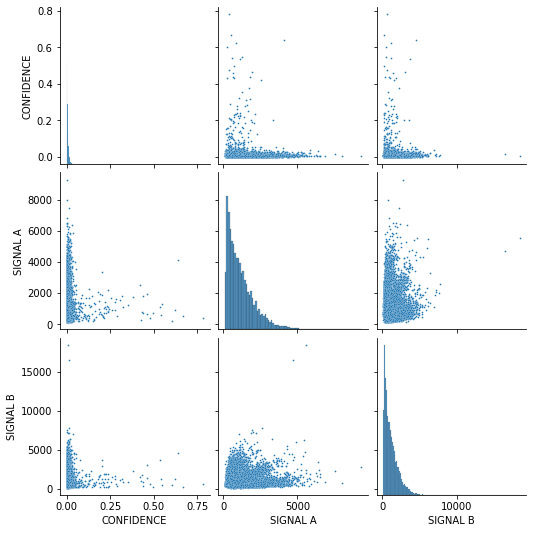

In [63]:
sns.pairplot(data_tab[['CONFIDENCE','SIGNAL A','SIGNAL B']].sample(10000),plot_kws={"s": 3}) #,hue = 'CONFIDENCE'

C:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SIGNAL A', ylabel='SIGNAL B'>

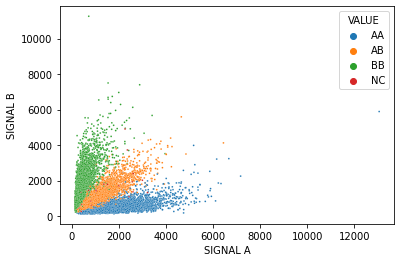

In [76]:
sns.scatterplot('SIGNAL A', 'SIGNAL B', hue='VALUE', s=3, data = data_tab[['VALUE','SIGNAL A','SIGNAL B']].sample(10000))

C:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SIGNAL A', ylabel='SIGNAL B'>

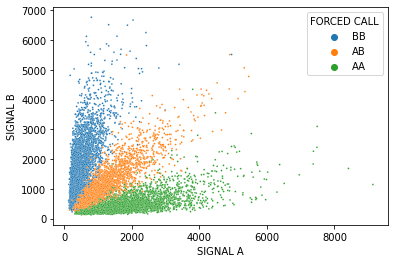

In [72]:
sns.scatterplot('SIGNAL A', 'SIGNAL B', hue='FORCED CALL', s = 3, data = data_tab[['FORCED CALL','SIGNAL A','SIGNAL B']].sample(10000))

In [82]:
data_tab[data_tab['CONFIDENCE']>0.01].shape

(164138, 6)

In [83]:
data_tab[data_tab['CONFIDENCE']>0.025]

,ID_REF,VALUE,CONFIDENCE,FORCED CALL,SIGNAL A,SIGNAL B
53,SNP_A-2017796,AB,0.046987,AB,4616.753418,2930.890625
55,SNP_A-2018492,AB,0.063099,AB,1440.384766,1499.575439
57,SNP_A-4216035,BB,0.063033,BB,320.441589,770.650513
106,SNP_A-1876955,BB,0.056200,BB,289.061615,853.285034
196,SNP_A-4209947,AB,0.025634,AB,3277.341309,4062.202148
...,...,...,...,...,...,...
909486,AFFX-SNP_5607293,BB,0.037876,BB,317.400726,807.974182
909496,AFFX-SNP_12415043,AB,0.060759,AB,496.260315,562.140198
909500,AFFX-SNP_12469241,AB,0.063892,AB,838.875793,601.067383
909510,AFFX-SNP_8512549,NC,0.178018,BB,586.535278,784.047668


C:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SIGNAL A', ylabel='SIGNAL B'>

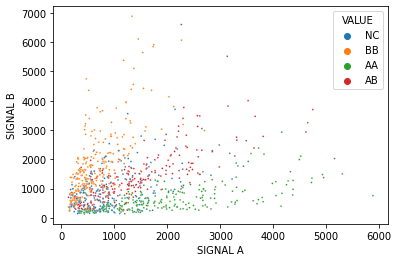

In [87]:
sns.scatterplot('SIGNAL A', 'SIGNAL B', hue='VALUE', s=3, data = data_tab[data_tab['CONFIDENCE']>0.025].sample(1000))

In [88]:
data_tab.to_csv('GSM1372995_data.csv')

In [102]:
i = data_ALL.gpls['GPL6801'].table
i.to_csv('gpls.csv')

In [101]:
i = data_ALL.gpls['GPL6801'].table
i[i['RANGE_START'].isna()].to_csv('gpls_SNP.csv')

In [97]:
data_ALL.gpls['GPL6801'].table

,ID,Chromosome,RANGE_GB,RANGE_START,RANGE_STOP,STRAND,Physical Position,SNP_ID,Allele A,Allele B
0,SNP_A-1780419,1,NC_000001.10,NaN,NaN,-,84875173,rs6576700,A,G
1,SNP_A-1780418,5,NC_000005.9,NaN,NaN,-,156390980,rs17054099,C,T
2,SNP_A-1780415,5,NC_000005.9,NaN,NaN,-,158729947,rs7730126,A,G
3,SNP_A-1780414,9,NC_000009.11,NaN,NaN,+,22976592,rs2061700,A,C
4,SNP_A-1780413,11,NC_000011.9,NaN,NaN,+,26300969,rs10834942,A,G
...,...,...,...,...,...,...,...,...,...,...
1880789,CN_943501,Y,NaN,28776718,28776743,+,NaN,NaN,NaN,NaN
1880790,CN_943488,Y,NaN,28742338,28742363,+,NaN,NaN,NaN,NaN
1880791,CN_943500,Y,NaN,28775153,28775178,+,NaN,NaN,NaN,NaN
1880792,CN_943487,Y,NaN,28741856,28741881,+,NaN,NaN,NaN,NaN


In [56]:
data_ALL.gsms['GSM1372995'].columns

,description
ID_REF,PROBE SET NAME
VALUE,"Genotype Call (SNP call): AA, AB, BB, NC, and ..."
CONFIDENCE,
FORCED CALL,
SIGNAL A,
SIGNAL B,


In [ ]:
for ID in data_ALL.metadata['sample_id']:
    i = data_ALL.gsms[ID].table
    print(i[i['ID_REF'].str.contains('CN')])

In [95]:
i = data_ALL.gsms['GSM1373029'].table
print(i[i['ID_REF'].str.contains('CN')])

,ID_REF,VALUE,CONFIDENCE,FORCED CALL,SIGNAL A,SIGNAL B
